# <span style="color:#0b486b">SIT 112 - Data Science Concepts</span>

---
Lecturer: Dinh Phung | dinh.phung@deakin.edu.au<br />
Assistant: Adham Beyki | abeyki@deakin.edu.au

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

---
## <span style="color:#0b486b">Practical Session 11: Confidence Interval</span> 

### <span style="color:#0b486b">Population vs Sample</span> 

The main difference between population and sample comes down to how observations are assigned to dataset. A **population** includes all of the elements from the dataset. A **sample** consists of one or more observations from the population. In other words **population** is the entire collection of the desired measurable characteristic that we would have, if we could collect it. 

For example if suppose we want to find the average height of 2nd grade students in Australia. The population would be all the students who are studying in 2nd grade in Australia. But most probably we can not measure the height of all Australian 2nd grade students. It is not feasible. So what do we do? **We sample!**. We collect the height of some of Australian 2nd graders and based on that, we **estimate** the average height of the population (all of Australian 2nd grade students). The sample could be 2nd grade students of one class in one school, or multiple classes in multiple schools in one state, or  multiple schools in multiple states, or etc.

A measurable statistic of a population (such as mean) is called a **parameter**. But a measurable characteristic of a sample is called **statistic**.

----
### <span style="color:#0b486b">Confidence Interval</span> 

As stated in previous section, population parameter is unknown. Confidence interval is a type of interval estimate of a population parameter calculated from sample statistics. It is an interval estimate combined with a probability.

For the aforementioned example, it means that without collecting the height of all Aussie 2nd graders, we can estimate the average height by collecting a sample and using the below formula:


$$Confidence\, Interval=\bar{X}\pm z\frac{s}{\sqrt{n}}$$

$s$ is the sample standard deviation, $n$ is the sample size, and $z$ is often read from a table.

    confidence level (%)     z
         
            70              1.04 
            75              1.15
            80              1.28 
            85              1.44 
            90              1.645
            92              1.75
            95              1.96
            96              2.05
            98              2.33
            99              2.58

Now lets use an example to clarify this concept.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

%matplotlib inline
sns.set()

First we create a population. Please note that we do not use the population in our computations. We use samples from it.

In [2]:
mu, sigma = 10, 2
n_population = 10000
population = np.random.normal(mu, sigma, n_population)

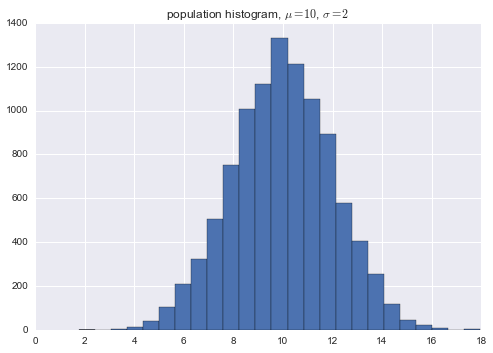

In [4]:
fig, ax = plt.subplots()
ax.hist(population, bins=25)
ax.set_title(r"population histogram, $\mu={}$, $\sigma={}$ ".format(mu, sigma))

Now we sample multiple times from this population.

In [5]:
n_trials = 1000
sample_size = 500
samples = np.zeros([n_trials, sample_size])
sample_std = np.zeros(n_trials)
sample_mean = np.zeros(n_trials)

for i in xrange(n_trials):
    samples[i] = np.random.choice(population, size=sample_size, replace=False)
    sample_mean[i] = samples[i].mean()
    sample_std[i] = samples[i].std()

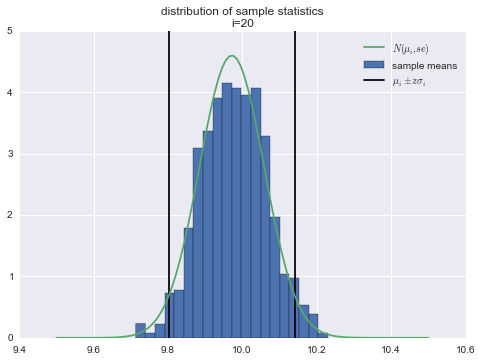

In [13]:
i = 20
se = sample_std[i] / np.sqrt(sample_size)
dist = ss.distributions.norm(sample_mean[i], se)
z = 1.96

x = np.linspace(9.5, 10.5, 100)
y = dist.pdf(x)

fig, ax = plt.subplots()
    
ax.hist(sample_mean, normed=True, bins=20, label='sample means')
ax.plot(x, y, label="$N(\mu_{i},se)$")
ax.vlines(sample_mean[i] + z*se, 0, 5, label='$\mu_i \pm z\sigma_i$')
ax.vlines(sample_mean[i] - z*se, 0, 5)

ax.set_title("distribution of sample statistics\ni={}".format(i))
ax.legend()
